In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0,'../')

# Notebook: Simulation Results

In [5]:
import matplotlib.pyplot as plt
import prfm.simulations as sims
plt.rcParams['figure.dpi']=200

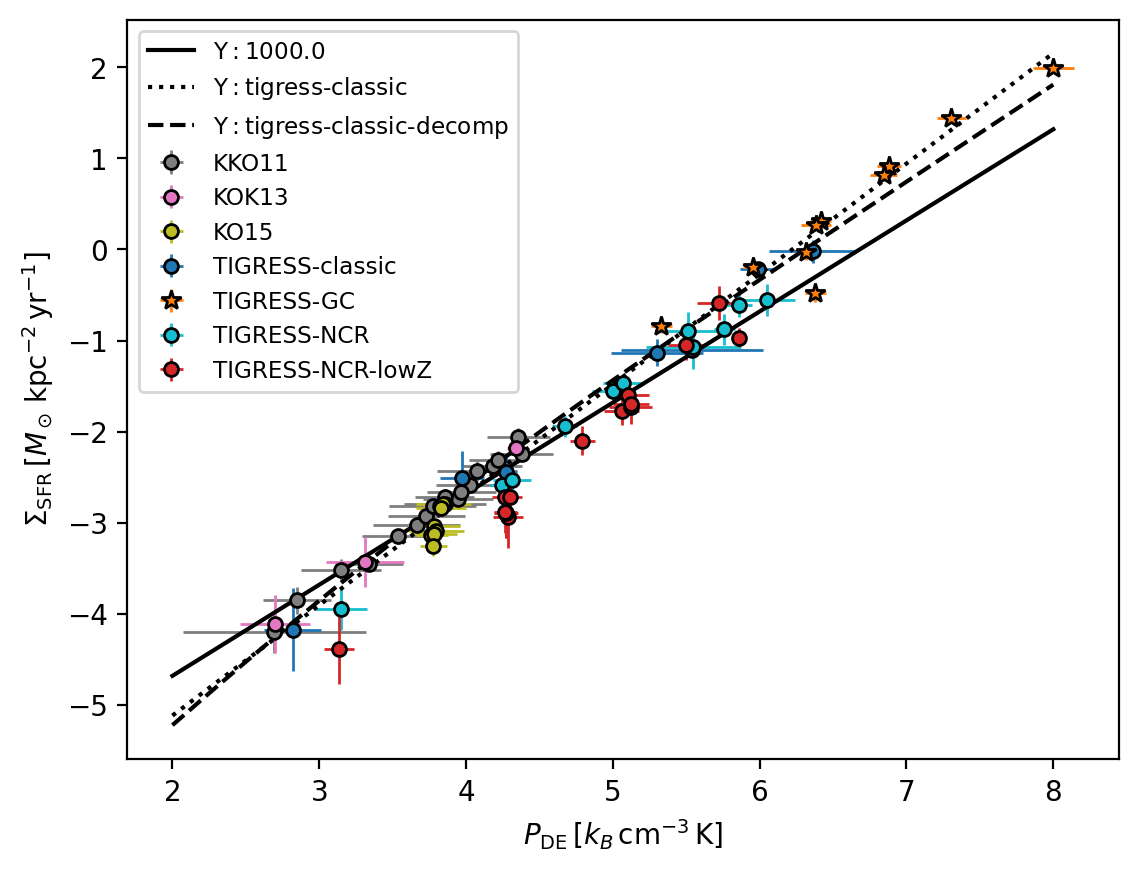

In [6]:
# all simulations
for i,(k,data) in enumerate(sims.data.items()):
    p = sims.add_one_sim(data)

# P_SFR
sims.add_PSFR_model_lines(Wmin=2,Wmax=8)
plt.legend(fontsize='small')


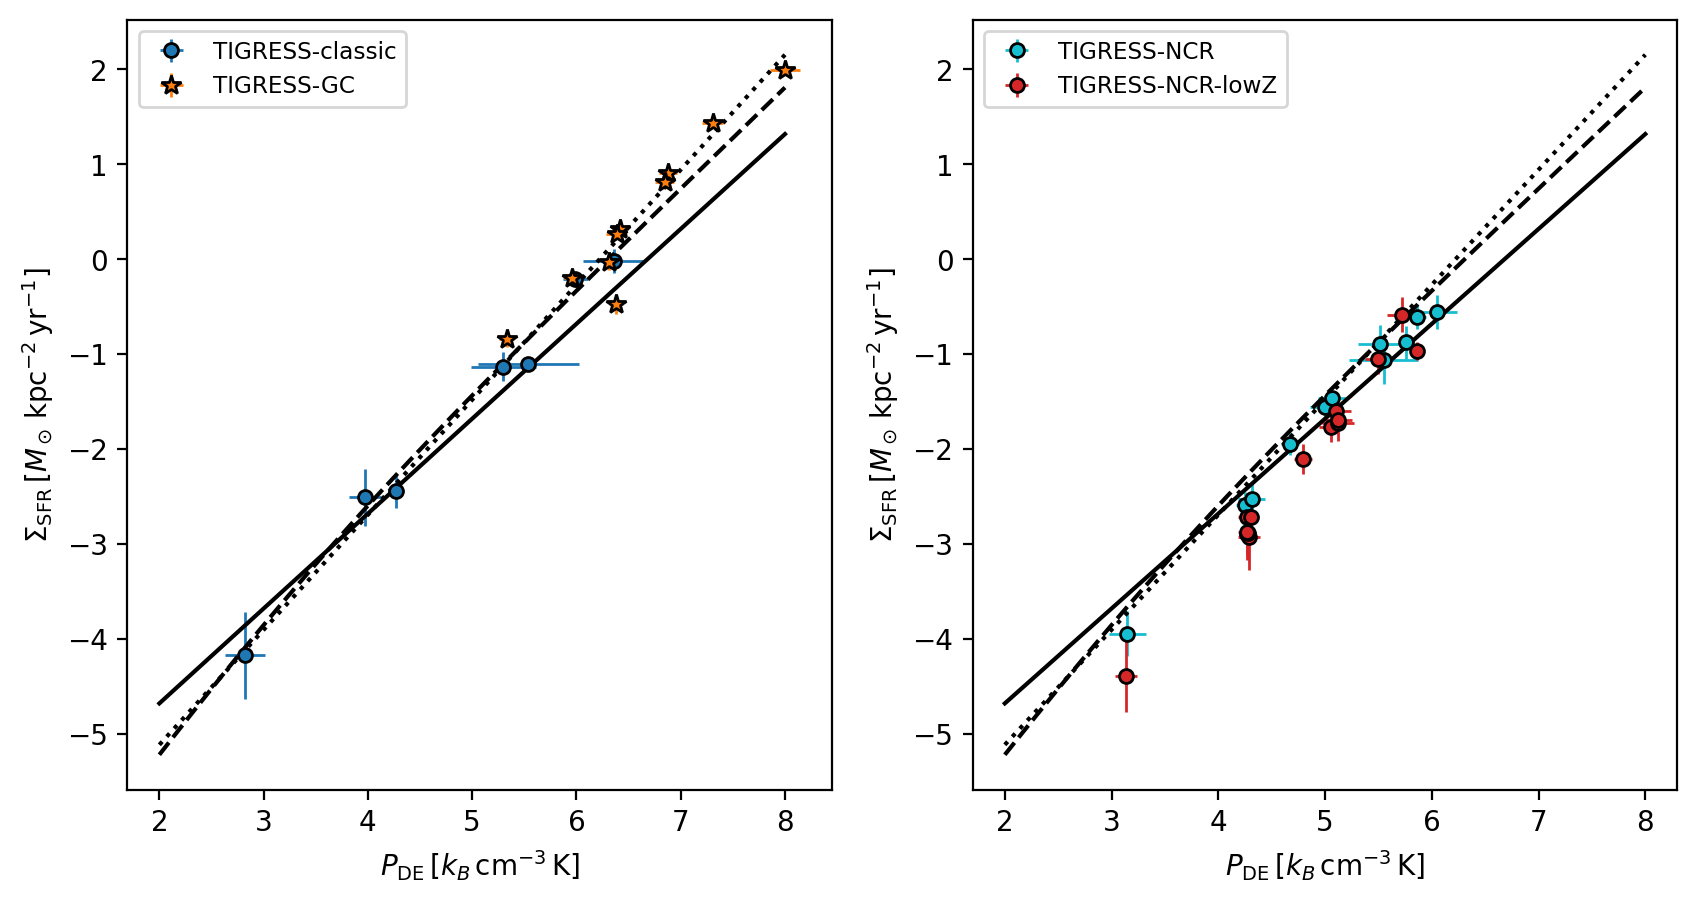

In [7]:
fig,axes = plt.subplots(1,2,figsize=(10,5))

for ax, mlist in zip(axes,[['TIGRESS-classic','TIGRESS-GC'],
                           ['TIGRESS-NCR','TIGRESS-NCR-lowZ']]):
    plt.sca(ax)
    for i,k in enumerate(mlist):
        data = sims.data[k]
        p = sims.add_one_sim(data)
    plt.legend(fontsize='small')
    sims.add_PSFR_model_lines(Wmin=2,Wmax=8)


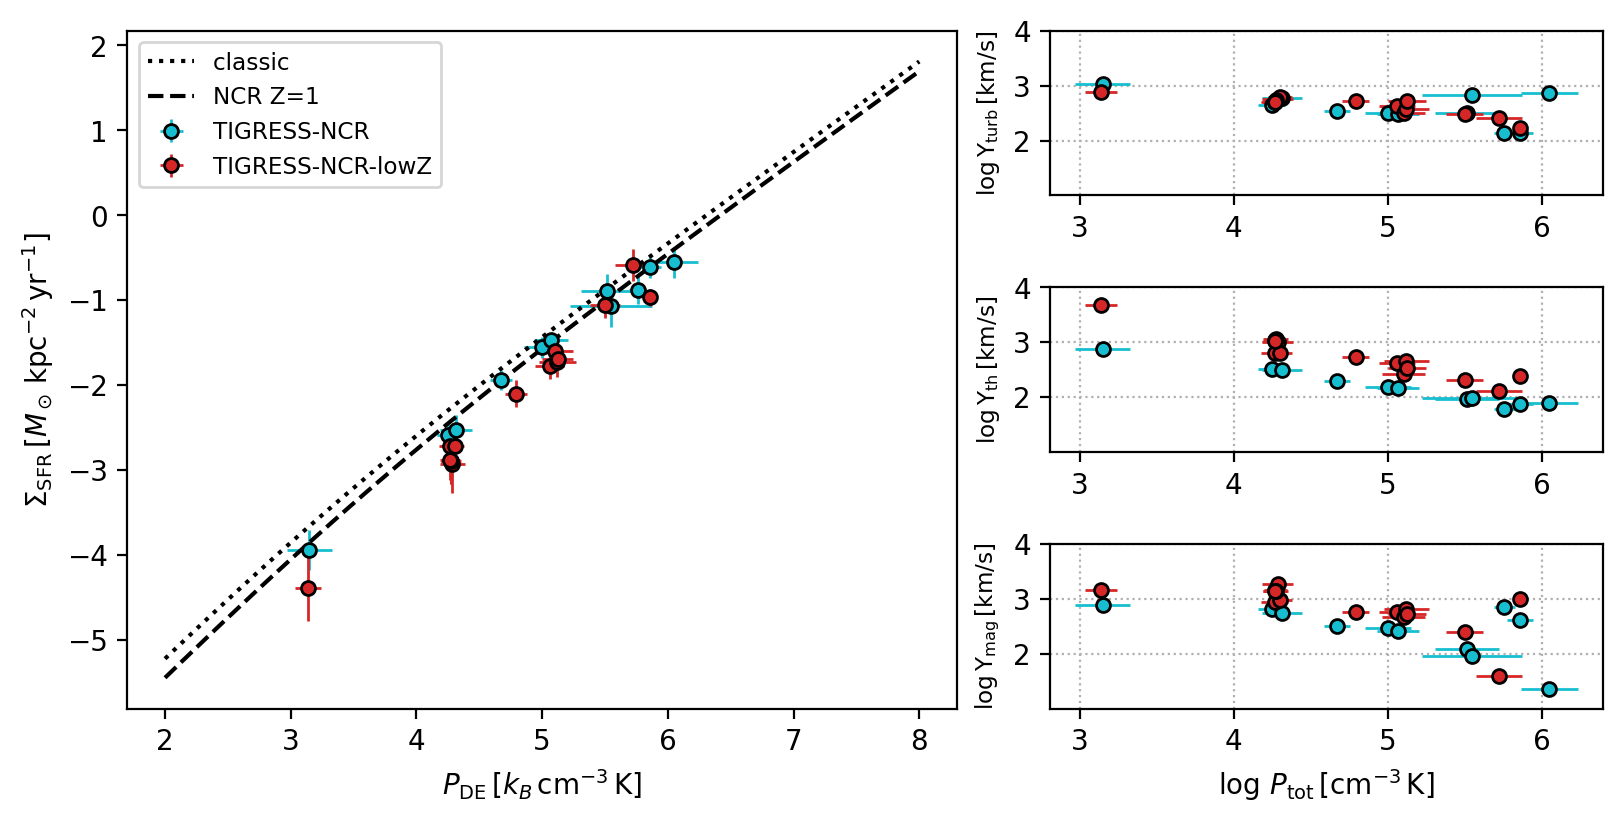

In [12]:
fig, main_ax, side_axes = sims.setup_axes(figsize=(8,4),width_ratios=(1.5,1))
for k in ['TIGRESS-NCR','TIGRESS-NCR-lowZ']:
    data = sims.data[k]
    plt.sca(main_ax)
    sims.add_one_sim(data,xf='Ptot',yf='SFR')
    for ax,yf in zip(side_axes,['Y_Pturb','Y_Pth','Y_Pimag']):
        plt.sca(ax)
        sims.add_one_sim(data,yf=yf)
        plt.ylim(1,4)
        plt.yticks([2,3,4])
        plt.ylabel(r'$\log \Upsilon_{{\rm {}}}\,[{{\rm km/s}}]$'.format(yf[2:].replace('Pi','P')[1:]),fontsize='small')
        plt.grid('on',ls=':')
    plt.xlabel(r'$\log\,P_{\rm tot}\,[{\rm cm^{-3}\,K}]$')
plt.sca(main_ax)
sims.add_PSFR_model_line(model='tigress-classic-decomp',ls=':',color='k',label='classic ')
sims.add_PSFR_model_line(model='tigress-ncr-decomp',ls='--',color='k',label='NCR Z=1')
plt.legend(fontsize='small')


In [33]:
import prfm.prfm

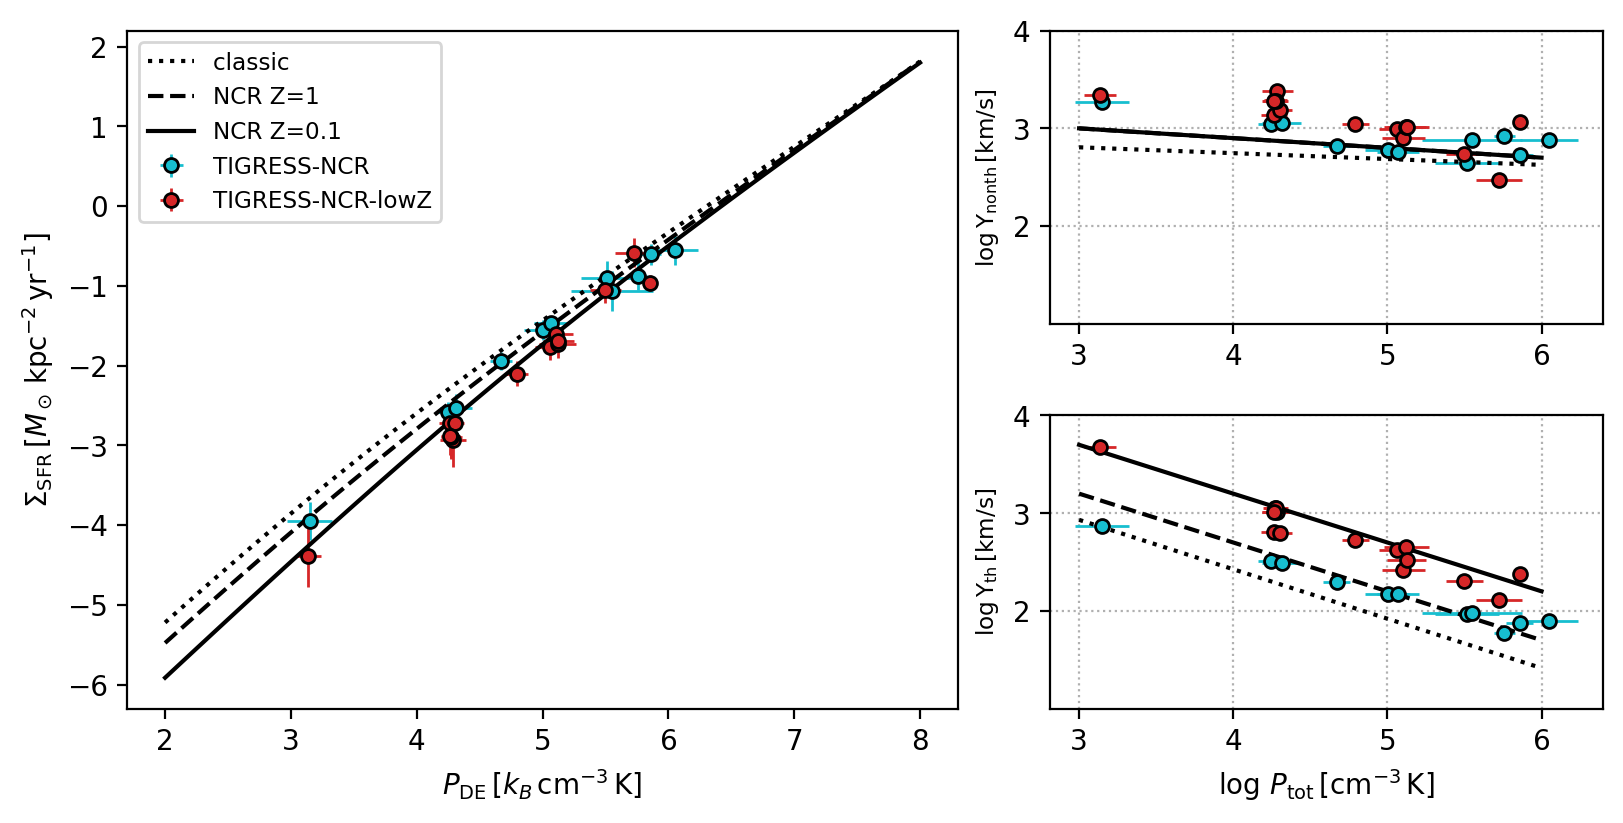

In [27]:
fig, main_ax, side_axes = sims.setup_axes(nrow=2,figsize=(8,4),width_ratios=(1.5,1))
for k in ['TIGRESS-NCR','TIGRESS-NCR-lowZ']:
    data = sims.data[k]
    plt.sca(main_ax)
    sims.add_one_sim(data,xf='Ptot',yf='SFR')
    for ax,yf in zip(side_axes,['Y_Pnonth','Y_Pth']):
        plt.sca(ax)
        sims.add_one_sim(data,yf=yf)
        plt.ylim(1,4)
        plt.yticks([2,3,4])
        plt.ylabel(r'$\log \Upsilon_{{\rm {}}}\,[{{\rm km/s}}]$'.format(yf[2:].replace('Pi','P')[1:]),fontsize='small')
        plt.grid('on',ls=':')
    plt.xlabel(r'$\log\,P_{\rm tot}\,[{\rm cm^{-3}\,K}]$')
plt.sca(main_ax)
sims.add_PSFR_model_line(model='tigress-classic-decomp',ls=':',color='k',label='classic ')
sims.add_PSFR_model_line(model='tigress-ncr-decomp',ls='--',color='k',label='NCR Z=1')
sims.add_PSFR_model_line(model='tigress-ncr-decomp-Z01',ls='-',color='k',label='NCR Z=0.1')

plt.legend(fontsize='small')
for ax,yf in zip(side_axes,['trb','th']):
    plt.sca(ax)
    sims.add_yield_model_lines(Wmin=3,Wmax=6,comp=yf)
